<div style="text-align: center;">
    <h1 style="font-size:26px;">RECOLECCIÓN Y COMPRENSIÓN DE LOS DATOS</h1>
</d>


### VARIABLES CUALITATIVAS

- **Product ID**: Es una cadena de caracteres que distingue a cada producto en el conjunto de datos.
- **Type**: Representa como las variantes de calidad del producto Low, Medium y High.
- **Machine Failure**: Es una variable binaria que indica si ha habido (1) o no (0) una falla en la máquina.
- **Fallo por desgaste de la herramienta (TWF)**: Indica si ha ocurrido (1) o no (0) un fallo debido al desgaste de la herramienta.
- **Fallo por disipación de calor (HDF)**: Indica si ha ocurrido (1) o no (0) un fallo debido a la disipación inadecuada de calor.
- **Fallo de potencia (PWF)**: Indica si ha ocurrido (1) o no (0) un fallo debido a problemas de potencia.
- **Fallo por sobredeformación (OSF)**: Indica si ha ocurrido (1) o no (0) un fallo debido a la sobre deformación.
- **Fallos aleatorios (RNF)**: Indica si ha ocurrido (1) o no (0) un fallo debido a razones aleatorias no especificadas.

### VARIABLES CUANTITATIVAS

- **Air temperature [K]**: Mide el calor o frío del aire ambiente alrededor del proceso.
- **Process temperature [K]**: Es la temperatura interna en el lugar donde ocurre el proceso productivo.
- **Rotational speed [rpm]**: Velocidad de rotación en revoluciones por minuto (rpm), mide cuántas veces por minuto gira una parte específica del equipo.
- **Torque [Nm]**: Es la cantidad de fuerza que actúa sobre un objeto para hacerlo girar.
- **Tool wear [min]**: Indica el tiempo acumulado que la herramienta ha estado en uso y su desgaste.

#### IMPORTAMOS LAS LIBRERIAS NESESARIAS

In [1]:
import pandas as pd  # Para manejar los datos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos más complejos
import numpy as np  # Para operaciones numéricas
import warnings #Elimina mensajes de alerta
warnings.simplefilter("ignore")
plt.style.use('Solarize_Light2') #plt.style.use('dark_background') 

## REALIZAMOS LA LECTURA DE NUESTRA DATOS DE MAQUINARIA INDUSTRIAL

In [2]:
import pandas as pd  # Para manejar los datos
base = pd.read_csv('MAQUINAS_1.csv', delimiter=',', index_col='UDI')

## EXPLORACION INICIAL Y CORRECCION DE LA COLUMNA OBJETIVO "Machine Failure"

In [3]:
base.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure,Fallo por desgaste de la herramienta (TWF),Fallo por disipacion de calor (HDF),Fallo de potencia (PWF),Fallo por sobredeformación (OSF),Fallos aleatorios (RNF)
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
#trasladamos la columna Machine Failure al final de la data
# Crear una lista de las columnas
columnas = base.columns.tolist()

# Eliminar 'Machine Failure' de la lista de columnas
columnas.remove('Machine Failure')

# Agregar 'Machine Failure' al final de la lista
columnas.append('Machine Failure')

# Reordenar el DataFrame utilizando la nueva lista de columnas
base = base[columnas]

# Mostrar el DataFrame reordenado
base.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Fallo por desgaste de la herramienta (TWF),Fallo por disipacion de calor (HDF),Fallo de potencia (PWF),Fallo por sobredeformación (OSF),Fallos aleatorios (RNF),Machine Failure
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
#VERIFICAMOS LOS TIPOS DE VARIABLES CON LAS QUE CONTAMOS 
base.dtypes

Product ID                                     object
Type                                           object
Air temperature [K]                           float64
Process temperature [K]                       float64
Rotational speed [rpm]                          int64
Torque [Nm]                                   float64
Tool wear [min]                                 int64
Fallo por desgaste de la herramienta (TWF)      int64
Fallo por disipacion de calor (HDF)             int64
Fallo de potencia (PWF)                         int64
Fallo por sobredeformación (OSF)                int64
Fallos aleatorios (RNF)                         int64
Machine Failure                                 int64
dtype: object

In [6]:
#CANTIDAD DE DATOS Y COLUMNAS
base.shape

(10000, 13)

In [7]:
#VISTA DE LAS CONLUMNAS CON LAS QUE CONTAMOS
base.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Fallo por desgaste de la herramienta (TWF)',
       'Fallo por disipacion de calor (HDF)', 'Fallo de potencia (PWF)',
       'Fallo por sobredeformación (OSF)', 'Fallos aleatorios (RNF)',
       'Machine Failure'],
      dtype='object')

## ANALISIS EXPLORATORIO DE DATOS (EDA)

### CARACTERISTICAS DEL CONJUNTO DE DATOS

In [8]:
#vista de datos estadisticos de las variables cuantitativas no binarias
base[['Air temperature [K]', 
      'Process temperature [K]', 
      'Rotational speed [rpm]', 
      'Torque [Nm]', 
      'Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [9]:
#vista de datos estadisticos de las variables cuantitativas binarias
base[['Fallo por desgaste de la herramienta (TWF)', 
      'Fallo por disipacion de calor (HDF)', 
      'Fallo de potencia (PWF)', 'Fallo por sobredeformación (OSF)', 
      'Fallos aleatorios (RNF)','Machine Failure']].describe()

,Fallo por desgaste de la herramienta (TWF),Fallo por disipacion de calor (HDF),Fallo de potencia (PWF),Fallo por sobredeformación (OSF),Fallos aleatorios (RNF),Machine Failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.004600,0.011500,0.009500,0.009800,0.00190,0.033900
std,0.067671,0.106625,0.097009,0.098514,0.04355,0.180981
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [10]:
#vista de datos estadisticos de las variables cuanlitativas
base[['Product ID', 'Type']].describe()

,Product ID,Type
count,10000,10000
unique,10000,3
top,L57163,L
freq,1,6000


In [11]:
# VERIFICAMOS LA CANTIDAD DE NULOS TOTALES
missing_values =base.isnull().sum()
print(missing_values)

Product ID                                    0
Type                                          0
Air temperature [K]                           0
Process temperature [K]                       0
Rotational speed [rpm]                        0
Torque [Nm]                                   0
Tool wear [min]                               0
Fallo por desgaste de la herramienta (TWF)    0
Fallo por disipacion de calor (HDF)           0
Fallo de potencia (PWF)                       0
Fallo por sobredeformación (OSF)              0
Fallos aleatorios (RNF)                       0
Machine Failure                               0
dtype: int64


In [12]:
#VERIFICAMOS LA CANTIDAD DE DATOS POR COLUMNA
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Product ID                                  10000 non-null  object 
 1   Type                                        10000 non-null  object 
 2   Air temperature [K]                         10000 non-null  float64
 3   Process temperature [K]                     10000 non-null  float64
 4   Rotational speed [rpm]                      10000 non-null  int64  
 5   Torque [Nm]                                 10000 non-null  float64
 6   Tool wear [min]                             10000 non-null  int64  
 7   Fallo por desgaste de la herramienta (TWF)  10000 non-null  int64  
 8   Fallo por disipacion de calor (HDF)         10000 non-null  int64  
 9   Fallo de potencia (PWF)                     10000 non-null  int64  
 10  Fallo por sobre

## VISUALIZACION DE DATOS

### HISTOGRAMAS DE LAS VARIABLES CONTINUAS

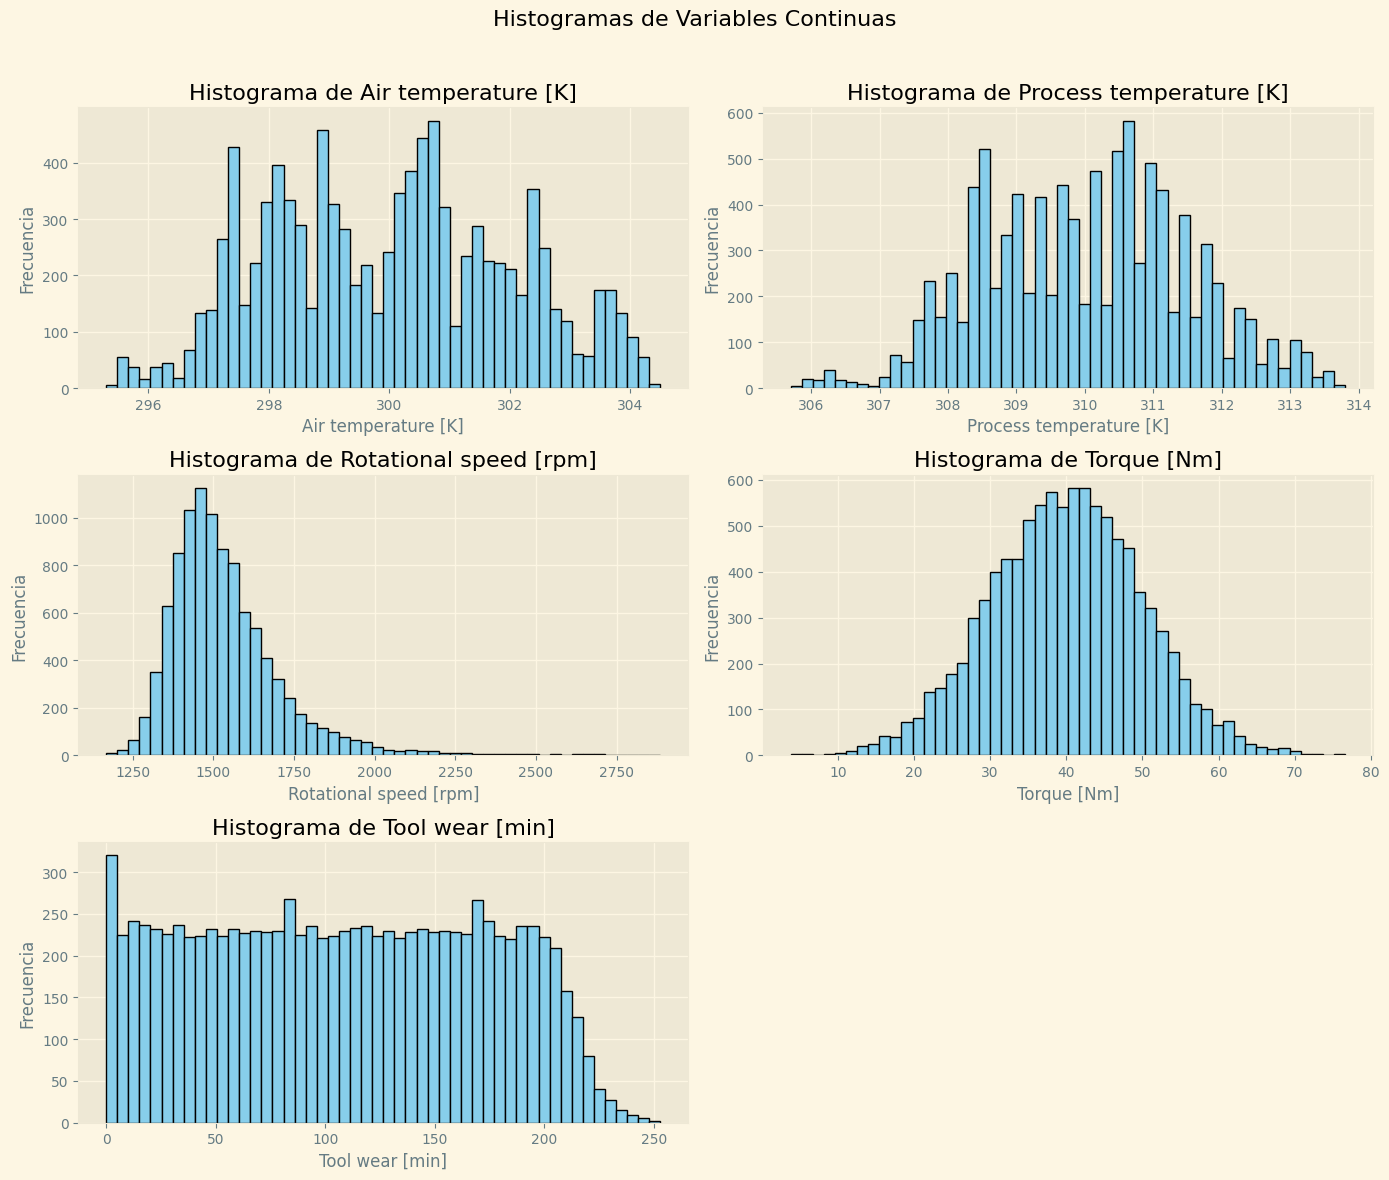

In [13]:
# Histogramas ajustando el diseño para las 5 variables continuas
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Histogramas de Variables Continuas', fontsize=16, color='black')


variables = [
    'Air temperature [K]', 
    'Process temperature [K]', 
    'Rotational speed [rpm]', 
    'Torque [Nm]', 
    'Tool wear [min]'
]

for ax, var in zip(axes.flatten(), variables):
    ax.hist(base[var], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de {var}',color='black')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')

# Eliminar el último gráfico vacío (si existe)
if len(variables) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[-1])

# Ajustar el diseño para una mejor presentación
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### GRAFICAS DE VARIABLES CATEGORICAS BINARIAS

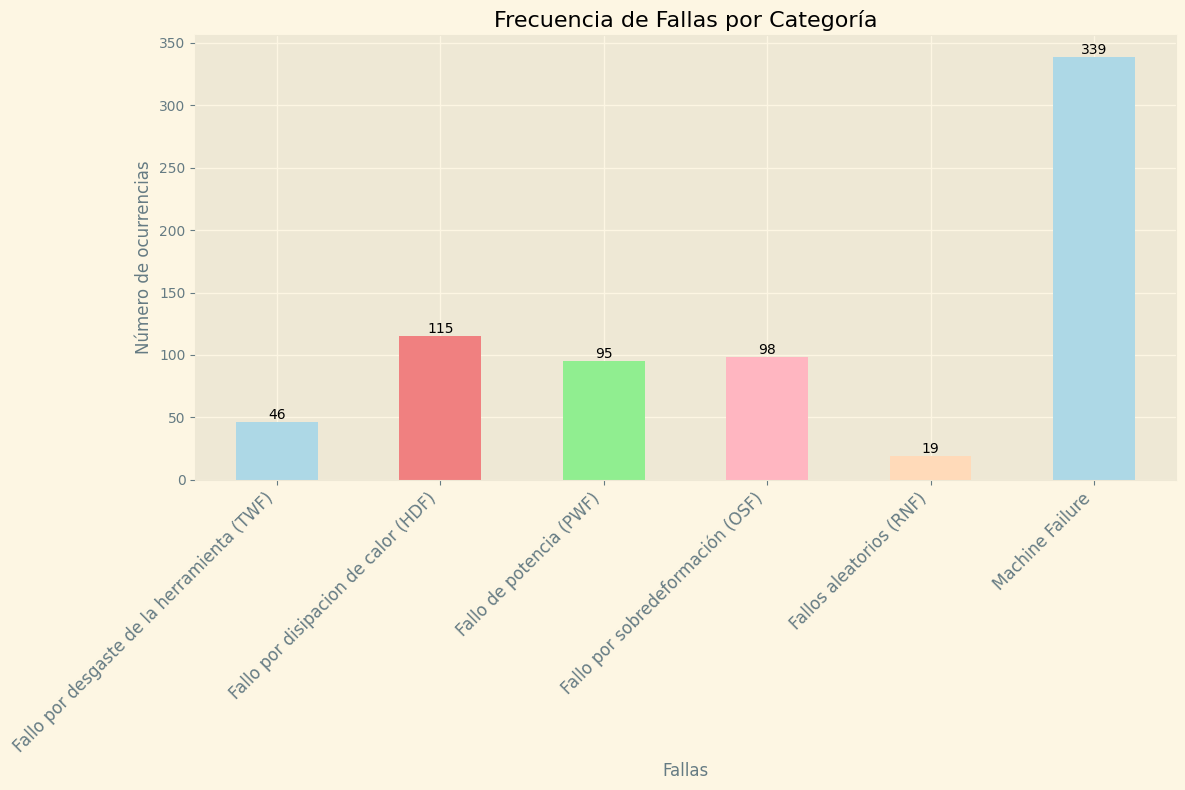

In [14]:
# Crear una tabla de frecuencias para cada columna binaria
data = base[['Fallo por desgaste de la herramienta (TWF)', 'Fallo por disipacion de calor (HDF)', 
             'Fallo de potencia (PWF)', 'Fallo por sobredeformación (OSF)', 
             'Fallos aleatorios (RNF)', 'Machine Failure']]

# Crear un gráfico de barras apiladas
ax = data.sum().plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'peachpuff'], figsize=(12, 8))

# Colocar los números encima de cada barra
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + i.get_y(), 
            f'{int(i.get_height())}', ha='center', va='bottom', color='black')

plt.title("Frecuencia de Fallas por Categoría", color='black')
plt.xlabel("Fallas")
plt.ylabel("Número de ocurrencias")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

### GRAFICA DE VARIABLES CATEGORICAS NO BINARIAS

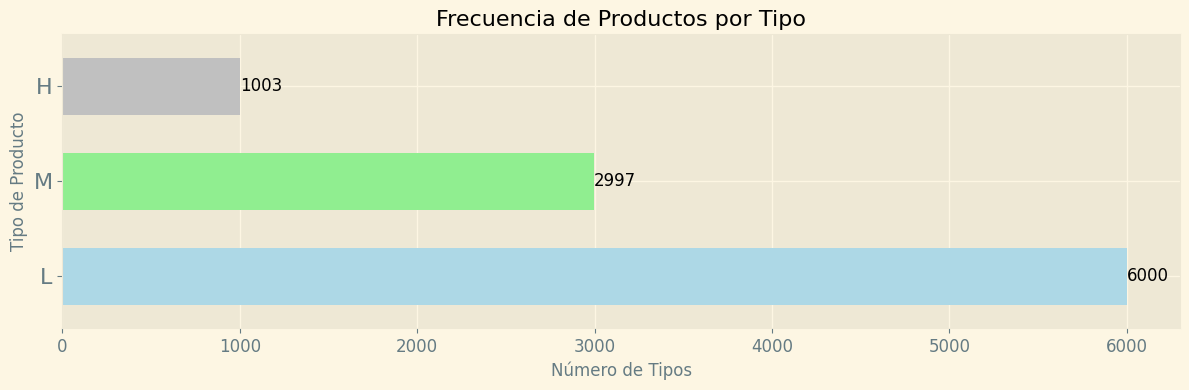

In [15]:
# Contar la frecuencia de cada tipo de producto
type_counts = base['Type'].value_counts()

# Crear el gráfico de barras horizontal con un tamaño de barra más delgado
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras horizontal con barras más delgadas
ax1 = type_counts.plot(kind='barh', color=['lightblue', 'lightgreen', 'silver'], figsize=(12, 4), width=0.6)

# Colocar los números al lado de cada barra
for i in ax1.patches:
    ax1.text(i.get_width() + i.get_x() + 1, i.get_y() + i.get_height() / 2, 
             f'{int(i.get_width())}', ha='left', va='center', color='black', fontsize=12)

# Añadir títulos y etiquetas
plt.title('Frecuencia de Productos por Tipo', color='black')
plt.xlabel('Número de Tipos')
plt.ylabel('Tipo de Producto')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


### ANALISIS GRAFICO DE VARIABLES CATEGORICAS Y CONTINUAS (RELACIONADAS CON EL FALLO DE MAQUINAS)

In [16]:
tabla_pivote1=pd.pivot_table(base, index=['Type'], values=['Air temperature [K]'], columns=['Machine Failure'], aggfunc=[np.mean, 'count'])
tabla_pivote1.head()

mean                           count     
                Air temperature [K]             Air temperature [K]     
Machine Failure                   0           1                   0    1
Type                                                                    
H                        299.839511  301.152381                 982   21
L                        299.985637  300.756596                5765  235
M                        299.996294  301.186747                2914   83

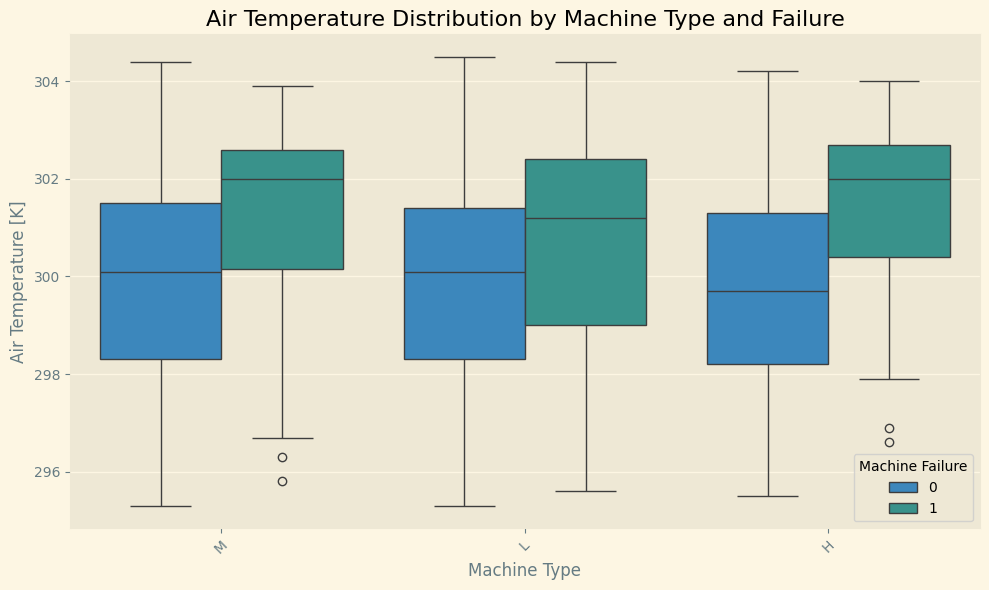

In [17]:
# Crear un gráfico de caja (boxplot) para la temperatura de aire por tipo de máquina y fallo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Air temperature [K]', hue='Machine Failure', data=base)

# Agregar títulos y etiquetas
plt.title('Air Temperature Distribution by Machine Type and Failure')
plt.xlabel('Machine Type')
plt.ylabel('Air Temperature [K]')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [18]:
tabla_pivote2=pd.pivot_table(base, index=['Type'], values=['Process temperature [K]'], columns=['Machine Failure'], aggfunc=[np.mean, 'count']) 
tabla_pivote2.head()

mean                               count  \
                Process temperature [K]             Process temperature [K]   
Machine Failure                       0           1                       0   
Type                                                                          
H                            309.917413  310.314286                     982   
L                            310.002671  310.248511                    5765   
M                            310.007859  310.402410                    2914   

                      
                      
Machine Failure    1  
Type                  
H                 21  
L                235  
M                 83

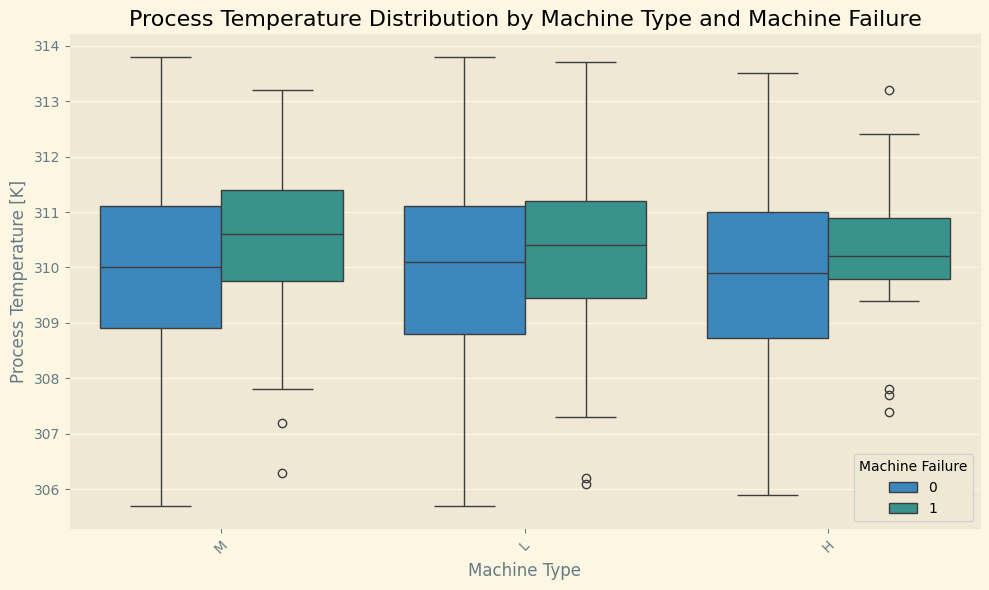

In [19]:
# Crear un gráfico de caja (boxplot) para la temperatura del proceso por tipo de máquina y fallo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Process temperature [K]', hue='Machine Failure', data=base)

# Agregar títulos y etiquetas
plt.title('Process Temperature Distribution by Machine Type and Machine Failure', color='black')
plt.xlabel('Machine Type')
plt.ylabel('Process Temperature [K]')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [20]:
tabla_pivote3=pd.pivot_table(base, index=['Type'], values=['Rotational speed [rpm]'], columns=['Machine Failure'], aggfunc=[np.mean, 'count'])
tabla_pivote3.head()

mean                               count  \
                Rotational speed [rpm]              Rotational speed [rpm]   
Machine Failure                      0            1                      0   
Type                                                                         
H                          1540.195519  1442.380952                    982   
L                          1541.795143  1482.408511                   5765   
M                          1537.244681  1550.036145                   2914   

                      
                      
Machine Failure    1  
Type                  
H                 21  
L                235  
M                 83

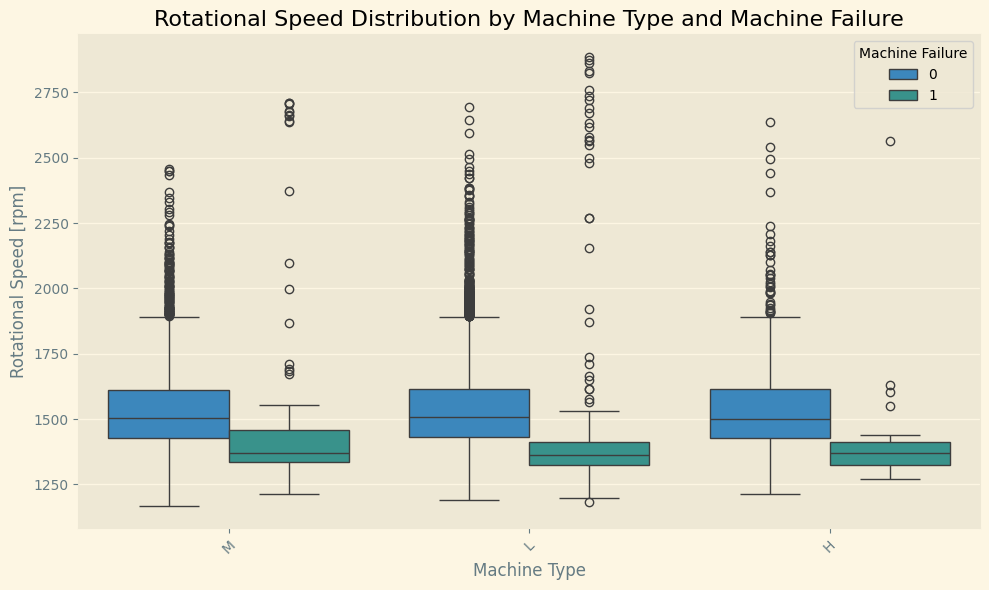

In [21]:
# Crear un gráfico de caja (boxplot) para la velocidad de rotación por tipo de máquina y fallo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rotational speed [rpm]', hue='Machine Failure', data=base)

# Agregar títulos y etiquetas
plt.title('Rotational Speed Distribution by Machine Type and Machine Failure', color='black')
plt.xlabel('Machine Type')
plt.ylabel('Rotational Speed [rpm]')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [22]:
tabla_pivote4=pd.pivot_table(base, index=['Type'], values=['Torque [Nm]'], columns=['Machine Failure'], aggfunc=[np.mean, 'count'])
tabla_pivote4.head() 

mean                  count     
                Torque [Nm]            Torque [Nm]     
Machine Failure           0          1           0    1
Type                                                   
H                 39.602240  50.876190         982   21
L                 39.556826  50.785106        5765  235
M                 39.782979  48.242169        2914   83

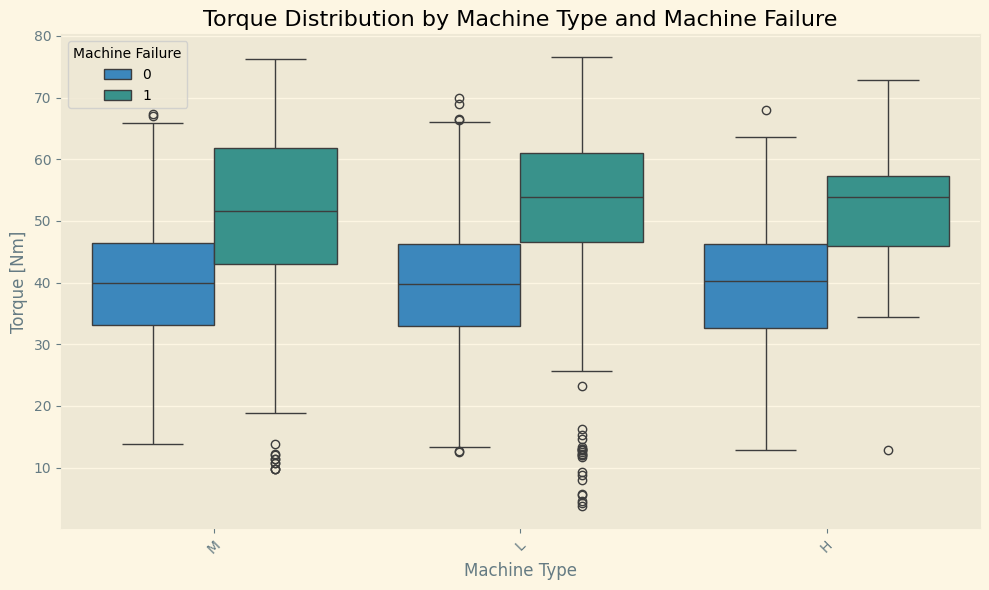

In [23]:
# Crear un gráfico de caja (boxplot) para el torque por tipo de máquina y fallo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Torque [Nm]', hue='Machine Failure', data=base)

# Agregar títulos y etiquetas
plt.title('Torque Distribution by Machine Type and Machine Failure', color='black')
plt.xlabel('Machine Type')
plt.ylabel('Torque [Nm]')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [24]:
tabla_pivote5=pd.pivot_table(base, index=['Type'], values=['Tool wear [min]'], columns=['Machine Failure'], aggfunc=[np.mean, 'count']) 
tabla_pivote5.head()

mean                       count     
                Tool wear [min]             Tool wear [min]     
Machine Failure               0           1               0    1
Type                                                            
H                    106.639511  143.904762             982   21
L                    106.727493  148.889362            5765  235
M                    106.645161  129.289157            2914   83

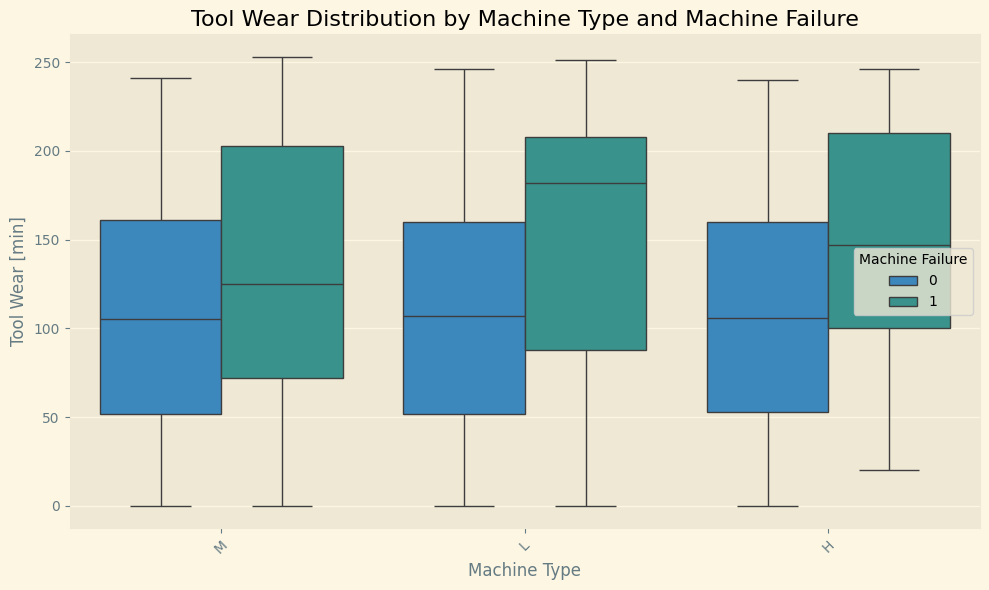

In [25]:
# Crear un gráfico de caja (boxplot) para el desgaste de la herramienta por tipo de máquina y fallo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Tool wear [min]', hue='Machine Failure', data=base)

# Agregar títulos y etiquetas
plt.title('Tool Wear Distribution by Machine Type and Machine Failure', color='black')
plt.xlabel('Machine Type')
plt.ylabel('Tool Wear [min]')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### ANALISIS GRAFICO DE VARIABLES CONTINUAS

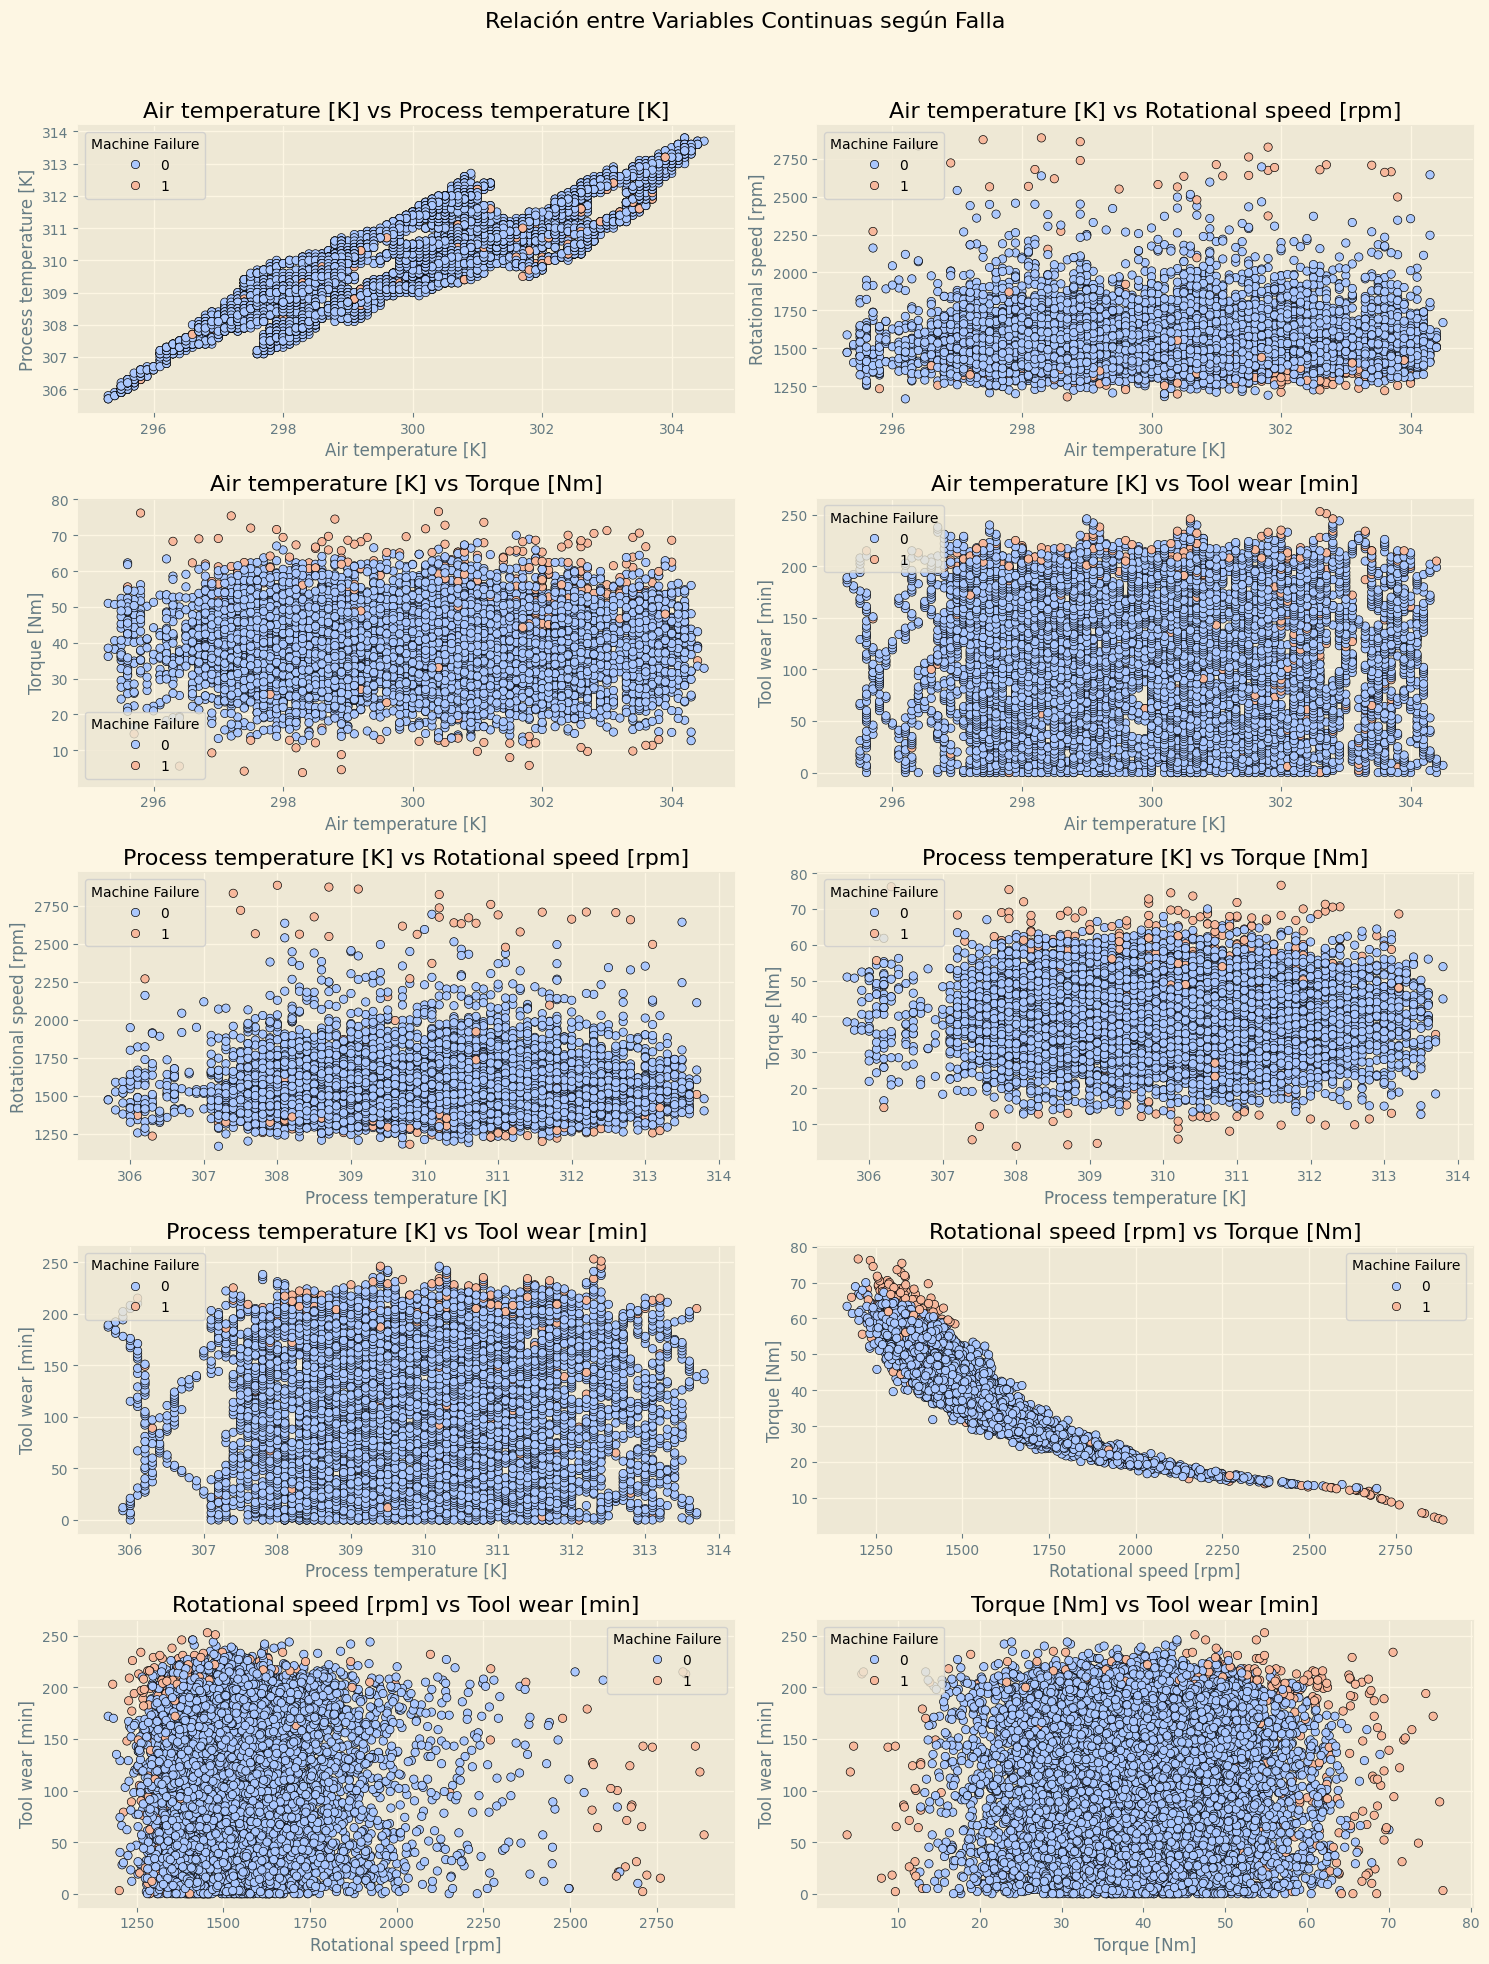

In [26]:
# Lista de variables continuas
variables = [
    'Air temperature [K]', 
    'Process temperature [K]', 
    'Rotational speed [rpm]', 
    'Torque [Nm]', 
    'Tool wear [min]'
]

# Crear todas las combinaciones de pares únicos
combinations = [(variables[i], variables[j]) for i in range(len(variables)) for j in range(i + 1, len(variables))]

# Configuración de los gráficos
fig, axes = plt.subplots(len(combinations) // 2 + len(combinations) % 2, 2, figsize=(15, len(combinations) * 2))
fig.suptitle('Relación entre Variables Continuas según Falla', fontsize=16, color='black')

# Graficar cada combinación
for (var1, var2), ax in zip(combinations, axes.flatten()):
    sns.scatterplot(data=base, x=var1, y=var2, hue='Machine Failure', palette='coolwarm', ax=ax, edgecolor='black')
    ax.set_title(f'{var1} vs {var2}', color='black')
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

# Eliminar ejes vacíos (si existen)
for ax in axes.flatten()[len(combinations):]:
    fig.delaxes(ax)

# Ajustar el diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### ANALISIS DE CORRELACIONES ENTRE LAS VARIABLES DEL DATASET

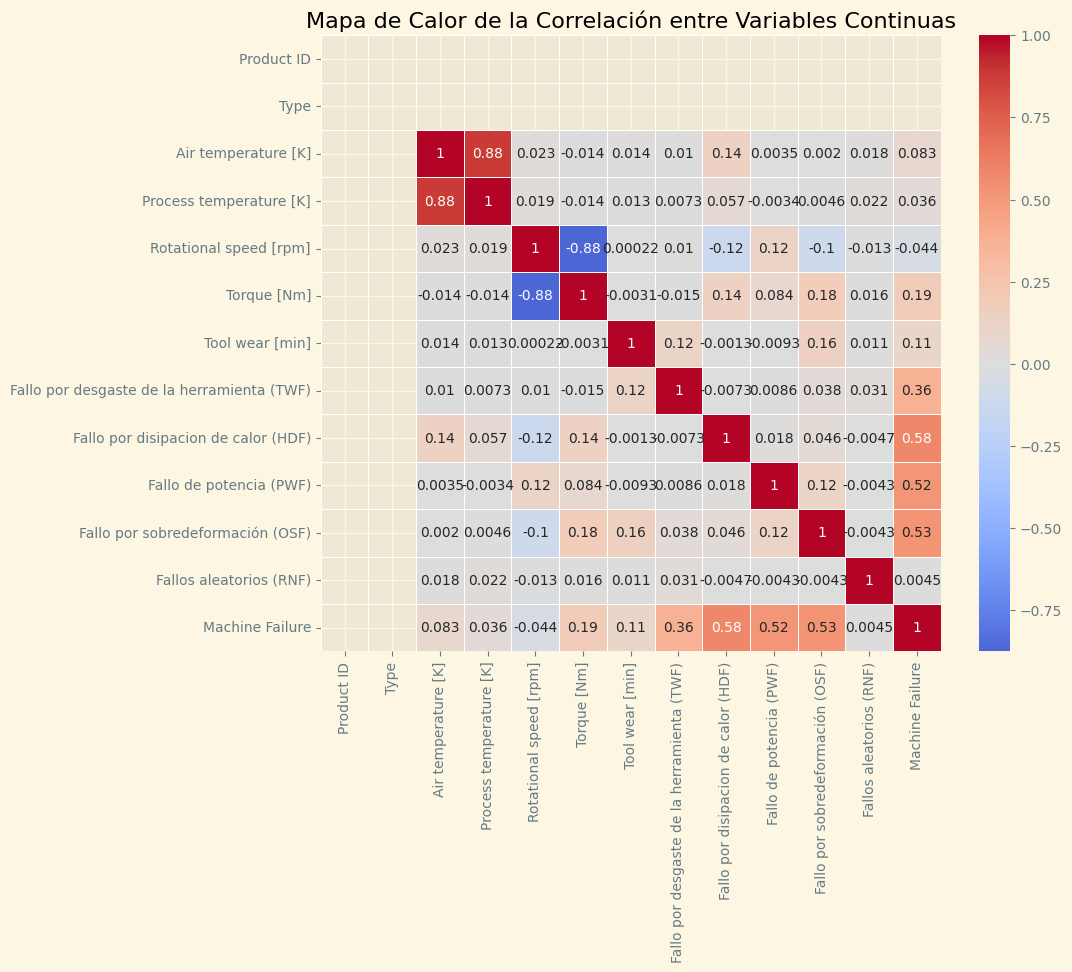

In [27]:
# Intentar convertir todas las columnas posibles a numéricas y reemplazar errores con NaN
base_numeric = base.apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación con las columnas numéricas
correlation_matrix = base_numeric.corr()

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='white')

# Título del mapa de calor
plt.title('Mapa de Calor de la Correlación entre Variables Continuas', fontsize=16, color='black')
plt.show()

In [28]:
# Guardar el DataFrame concatenado en un archivo Excel
base.to_csv('MAQUINAS_2.csv', index=False)